In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

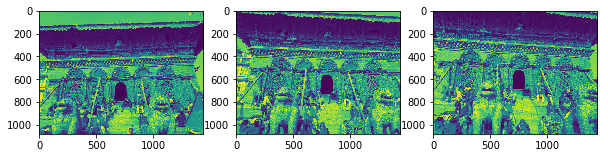

In [21]:
img1 = cv2.imread('reconstruct/1.jpg', 0)
img2 = cv2.imread('reconstruct/2.jpg', 0)
img3 = cv2.imread('reconstruct/3.jpg', 0)

figure = plt.figure(figsize=(10.0, 3.0))
plt.subplot(131)
plt.imshow(img1)

plt.subplot(132)
plt.imshow(img2)

plt.subplot(133)
plt.imshow(img3)

plt.show()

In [22]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

In [41]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
kp2, des3 = sift.detectAndCompute(img3, None)

print("# kps: {}, descriptors: {}".format(len(kp1), des1.shape))

# kps: 16611, descriptors: (16611, 128)


In [43]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches12 = bf.knnMatch(des1, des2, k=2)

matches12

[[<DMatch 0x7f0188219bd0>, <DMatch 0x7f0188122850>],
 [<DMatch 0x7f01881228d0>, <DMatch 0x7f0188122950>],
 [<DMatch 0x7f01881229b0>, <DMatch 0x7f0188122810>],
 [<DMatch 0x7f0188122990>, <DMatch 0x7f01881228f0>],
 [<DMatch 0x7f0188122910>, <DMatch 0x7f0188122930>],
 [<DMatch 0x7f0188122970>, <DMatch 0x7f0188122890>],
 [<DMatch 0x7f01881228b0>, <DMatch 0x7f0188122870>],
 [<DMatch 0x7f0188122830>, <DMatch 0x7f01881229d0>],
 [<DMatch 0x7f01881229f0>, <DMatch 0x7f0188122a10>],
 [<DMatch 0x7f0188122a30>, <DMatch 0x7f0188122a50>],
 [<DMatch 0x7f0188122a70>, <DMatch 0x7f0188122a90>],
 [<DMatch 0x7f0188122ab0>, <DMatch 0x7f0188122ad0>],
 [<DMatch 0x7f0188122af0>, <DMatch 0x7f0188122b10>],
 [<DMatch 0x7f0188122b30>, <DMatch 0x7f0188122b50>],
 [<DMatch 0x7f0188122b70>, <DMatch 0x7f0188122b90>],
 [<DMatch 0x7f0188122bb0>, <DMatch 0x7f0188122bd0>],
 [<DMatch 0x7f0188122bf0>, <DMatch 0x7f0188122c10>],
 [<DMatch 0x7f0188122c30>, <DMatch 0x7f0188122c50>],
 [<DMatch 0x7f0188122c70>, <DMatch 0x7f0188122

In [54]:
# Apply ratio test
good12 = []
for m,n in matches12:
    if m.distance > 0.75 * n.distance:
        good12.append([m])
        
good12

[[<DMatch 0x7f0188219bd0>],
 [<DMatch 0x7f01881228d0>],
 [<DMatch 0x7f01881229b0>],
 [<DMatch 0x7f0188122990>],
 [<DMatch 0x7f0188122910>],
 [<DMatch 0x7f0188122970>],
 [<DMatch 0x7f01881228b0>],
 [<DMatch 0x7f0188122830>],
 [<DMatch 0x7f01881229f0>],
 [<DMatch 0x7f0188122a30>],
 [<DMatch 0x7f0188122a70>],
 [<DMatch 0x7f0188122ab0>],
 [<DMatch 0x7f0188122af0>],
 [<DMatch 0x7f0188122b30>],
 [<DMatch 0x7f0188122b70>],
 [<DMatch 0x7f0188122bb0>],
 [<DMatch 0x7f0188122bf0>],
 [<DMatch 0x7f0188122c30>],
 [<DMatch 0x7f0188122c70>],
 [<DMatch 0x7f0188122cb0>],
 [<DMatch 0x7f0188122cf0>],
 [<DMatch 0x7f0188122d30>],
 [<DMatch 0x7f0188122d70>],
 [<DMatch 0x7f0188122df0>],
 [<DMatch 0x7f0188122e30>],
 [<DMatch 0x7f0188122e70>],
 [<DMatch 0x7f0188122eb0>],
 [<DMatch 0x7f0188122ef0>],
 [<DMatch 0x7f0188122f30>],
 [<DMatch 0x7f0188122f70>],
 [<DMatch 0x7f0188122fb0>],
 [<DMatch 0x7f0188125030>],
 [<DMatch 0x7f01881250b0>],
 [<DMatch 0x7f01881250f0>],
 [<DMatch 0x7f0188125130>],
 [<DMatch 0x7f018812

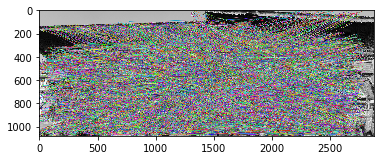

In [61]:
# cv2.drawMatchesKnn expects list of lists as matches.
img12 = cv2.drawMatchesKnn(img1,kp1, img2,kp2, good12,None,flags=2)

plt.imshow(img12)
plt.show()